<a href="https://colab.research.google.com/github/EdithOroche/IA/blob/main/Clasificaci%C3%B3n_de_Im%C3%A1genes_y_M%C3%A9tricas_PI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación de Imágenes y Métricas de Clasificación

Utilizaremos un modelo de Machine Learning para clasificar imágenes.
Usaremos el conjunto de datos MNIST.

# Configuración

In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

Algunas configuraciones para exportar gráficos:

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# MNIST

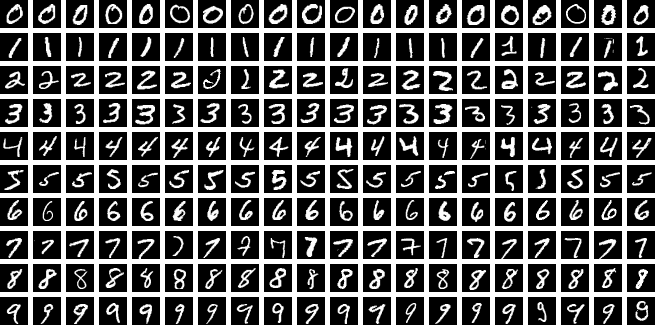

Importando MNIST

In [4]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [5]:
mnist.keys()  # extra code – we only use data and target in this notebook

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
X, y = mnist.data, mnist.target

Los X son las imágenes, que son solo píxeles. Donde 0 es negro y 255 es blanco.

In [7]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Verifiquemos el tamaño del tensor

In [8]:
X.shape

(70000, 784)

In [9]:
28 * 28

784

Tenemos en total 70,000 instancias (imágenes) y cada una consta de 784 píxeles (28x28 aplanados)

Miremos las clases.

In [10]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [11]:
y.shape

(70000,)

Tenemos también 70,000 imágenes. Cabe señalar que tenemos 70,000 pares (X,y) donde la etiqueta de la imagen X[0] es y[0].

Visualicemos la imagen 0.

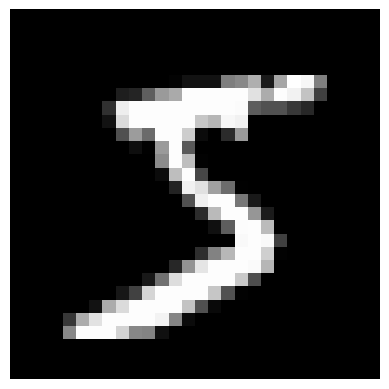

In [12]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="gray")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

Y ahora la etiqueta 0.

In [13]:
y[0]

'5'

Imprimamos las primeras 100 imágenes.

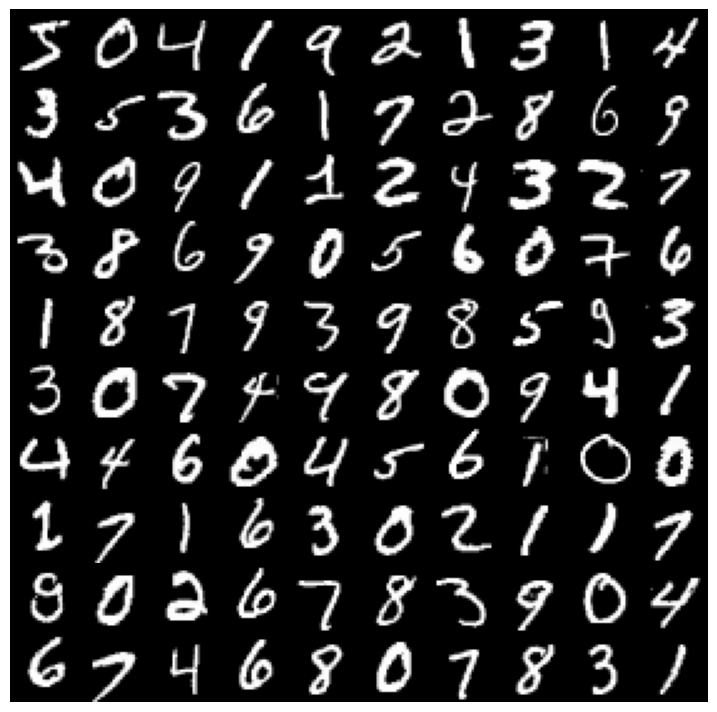

In [14]:
# extra code – this cell generates and saves Figure 3–2
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

Dividamos el conjunto de datos en entrenamiento y test (6:1).

In [15]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Entrenando un clasificador **binario**

Entrenaremos un clasificador que nos indique si la imagen mostrada es un 5 o no. Siendo True (1) para "es un 5" y False (0) para "no es un 5".

In [16]:
y_train

array(['5', '0', '4', ..., '5', '6', '8'], dtype=object)

In [17]:
# prompt: valores unicos de y_train

import numpy as np

np.unique(y_train)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [18]:
y_train_5 = (y_train == '5')  # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

In [19]:
np.unique(y_train_5)

array([False,  True])

Importaremos el SGDClassifier, que es una regresión logística cuyos paráemtros se calculan con Descenso por Gradiente.

In [20]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

Hagamos la predicción del dígito impreso (imagen) anteriormente.

In [21]:
sgd_clf.predict([some_digit])

array([ True])

Correctamente nos ha indicado que es un 5.

# Medidas de Performance

## Midiendo el Accuracy con Cross-Validation

Obtenemos el accuracy para cada fold generado por cross-validation.

In [22]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

Ahora probaremos otro clasificador, llamado el clasificador **tonto**, que no toma en cuenta las características y solo responde la clase más frecuente.

In [23]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)

DummyClassifier()

Ahora hagamos la predicción con el SGDC para el dígito impreso (imagen) anteriormente.

In [24]:
sgd_clf.predict([some_digit])

array([ True])

Ahora hagamos la predicción con el DUMMYCLASSIFIER para el dígito impreso (imagen) anteriormente.

In [25]:
dummy_clf.predict([some_digit])

array([False])

Sospechoso! Verifiquemos las predicciones para todos los datos.

In [26]:
pred_dummy_clf = dummy_clf.predict(X_train)

Veamos si encontramos algún True.

In [27]:
np.unique(pred_dummy_clf)

array([False])

Ahora calculemos su cross-validation accuracy.

In [28]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

Definitivamente, el accuracy o exactitud no es una buena medida del rendimiento.

## Matriz de Confusión

Vamos a calcular las predicciones para el conjunto de entrenamiento con el modelo SGD

In [29]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

Ahora calcularemos la matriz de confusión.

Recordemos que 1 es para "es un 5" y 0 para "no es un 5".

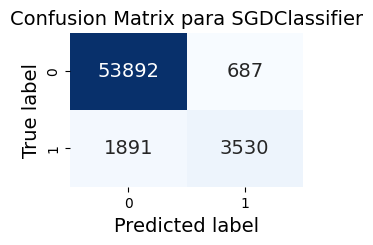

In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)

plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix para SGDClassifier')
plt.show()

Ahora calculemos la matriz de confusión para el modelo Dummy.

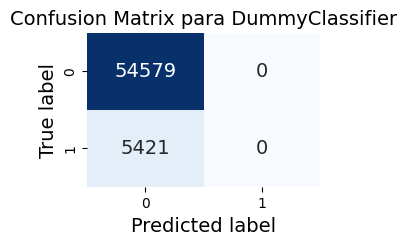

In [31]:
y_train_pred = cross_val_predict(dummy_clf, X_train, y_train_5, cv=3)

cm = confusion_matrix(y_train_5, y_train_pred)

plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix para DummyClassifier')
plt.show()

Como podemos ver, Dummy predice todo como la clase más frecuente.

Veamos cómo se vería la matriz de confusión perfecta:

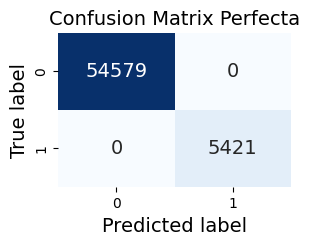

In [32]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
cm = confusion_matrix(y_train_5, y_train_perfect_predictions)
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix Perfecta')
plt.show()

## Precision y Recall

Volvamos a trabajar con el modelo SGD y calculemos estas 2 métricas.

In [33]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

O, también podemos calcularlo a mano de la matriz de confusión

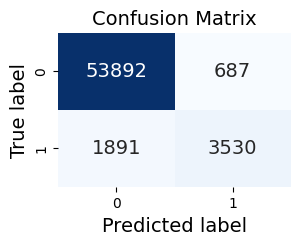

In [34]:
cm = confusion_matrix(y_train_5, y_train_pred)

plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [35]:
# extra code – this cell also computes the precision: TP / (FP + TP)
cm[1, 1] / (cm[0, 1] + cm[1, 1])   # == 3530 / (687 + 3530)

np.float64(0.8370879772350012)

Ahora calculemos el recall

In [36]:
recall_score(y_train_5, y_train_pred)  # == 3530 / (1891 + 3530)

0.6511713705958311

O, también podemos calcularlo a mano de la matriz de confusión.

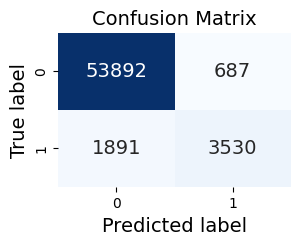

In [37]:
cm = confusion_matrix(y_train_5, y_train_pred)

plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [38]:
# extra code – this cell also computes the recall: TP / (FN + TP)
cm[1, 1] / (cm[1, 0] + cm[1, 1])

np.float64(0.6511713705958311)

Calculemos la métrica **f1_score**

In [39]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343847

Ahora, obtengamos un reporte completo de clasificación facilmente.

In [40]:
from sklearn.metrics import classification_report

print("\nClassification Report using scikit-learn:")
print(classification_report(y_train_5, y_train_pred, target_names=['not 5', '5']))


Classification Report using scikit-learn:
              precision    recall  f1-score   support

       not 5       0.97      0.99      0.98     54579
           5       0.84      0.65      0.73      5421

    accuracy                           0.96     60000
   macro avg       0.90      0.82      0.85     60000
weighted avg       0.95      0.96      0.95     60000



## Precision/Recall Trade-off

Veamos la salida del modelo SGDClassifier

In [41]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

SGDClassifier utiliza por defecto un umbral de 0.

In [42]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

Por lo tanto es exactamente igual a haber llamado a predict().

In [43]:
sgd_clf.predict([some_digit])

array([ True])

Probemos un umbral diferente

In [44]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

Dependiendo del umbral, podemos obtener una clase u otra.

Calculemos todas las salidas del modelo (antes de aplicar el umbral).

In [45]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [46]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

Con esta información, podemos probar diferentes umbrales y ver cómo varia la precision y recall.

In [47]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

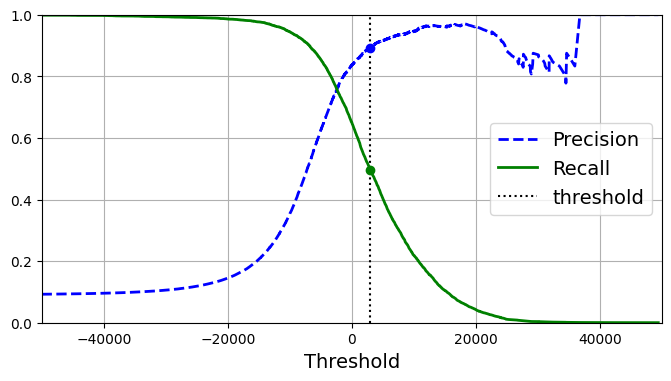

In [48]:
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")

plt.show()

Grafiquemos ahora directamente la precision vs recall.

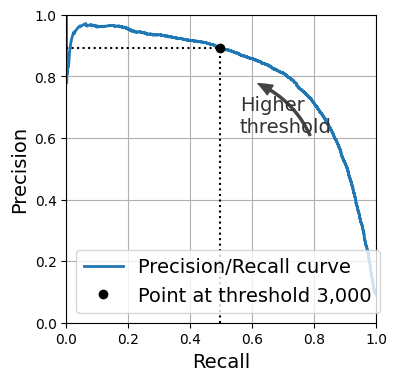

In [49]:
import matplotlib.patches as patches  # extra code – for the curved arrow

plt.figure(figsize=(4, 4))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

# extra code – just beautifies and saves Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

Podemos calcular el umbral donde la precisión es el 90%.

In [50]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

np.float64(3370.0194991439557)

In [51]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [52]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

Y también calcular su valor de recall.

In [53]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706

La elección entre precisión y recall depende del problema.

## The ROC Curve

Esta curva muestra el FPR vs TPR para varios umbrales

In [54]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

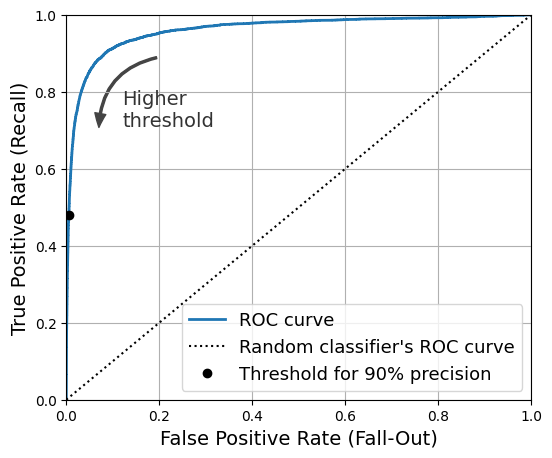

In [55]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# extra code – just beautifies and saves Figure 3–7
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

Deseamos obtener la menor cantidad de FPR y mayor de TPR.

In [56]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

np.float64(0.9604938554008616)

Podemos obtener estas métricas de area como una medida para comparar diferentes clasificadores independientemente del umbral seleccionado.

## Probando un Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [58]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

Veamos las probabilidades para las 2 primeras instancias:

In [59]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

Veamos cuantas estimaciones positivas tuvieron una probabilidad entre el 50% y el 60%.

In [60]:
# Not in the code
idx_50_to_60 = (y_probas_forest[:, 1] > 0.50) & (y_probas_forest[:, 1] < 0.60)
print(f"{(y_train_5[idx_50_to_60]).sum() / idx_50_to_60.sum():.1%}")

94.0%


94%! En este caso, en este caso las probabilidades estimadas del modelo fueron muy bajas.
Ahora, calculemos la curva AUC-PR.

In [61]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_5, y_scores_forest)

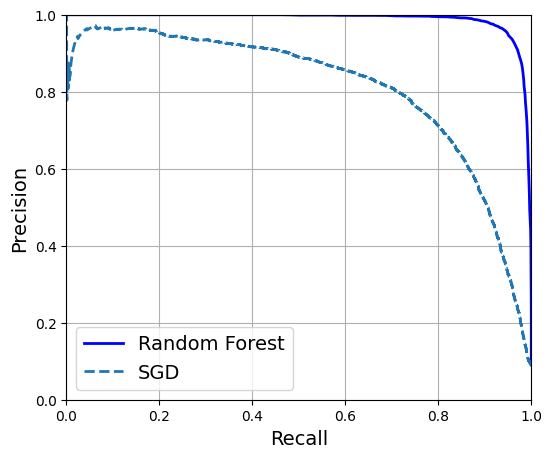

In [62]:
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

# extra code – just beautifies and saves Figure 3–8
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

Podemos aplicar un umbral de 50% y calcular el valor de F1-Score

In [63]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5  # positive proba ≥ 50%
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

Ahora, el área bajo la curva ROC.

In [64]:
roc_auc_score(y_train_5, y_scores_forest)

np.float64(0.9983436731328145)

La precisión

In [65]:
precision_score(y_train_5, y_train_pred_forest)

0.9897468089558485

Y el recall.

In [66]:
recall_score(y_train_5, y_train_pred_forest)

0.8725327430363402

# Preguntas

**1. ¿En qué clase comete más errores el dummy classifier?**

Este modelo falla mucho más en la clase del dígito 5. Esto sucede porque el dummy no aprende patrones ni características de las imágenes; simplemente repite una estrategia básica, como predecir siempre la clase más frecuente. Como el 5 no es la más común, prácticamente nunca aparece en sus predicciones, lo que genera una gran cantidad de errores en la clase.

**2. Explica por qué el dummy puede tener un accuracy aparentemente razonable y, sin embargo, ser inútil para detectar el dígito 5.**

El dummy classifier puede mostrar un accuracy que no parece tan malo porque acierta en algunas muestras simplemente por la distribución del dataset. En MNIST, cada clase aparece aproximadamente un 10% del tiempo, por lo que si el modelo predice siempre un número, acertará ese porcentaje. Esto hace que su exactitud total parezca aceptable. Sin embargo, esta métrica es engañosa, aunque el accuracy global se mantenga, el dummy no detecta absolutamente ningún dígito 5: su recall y precision para esa clase son cero. Esto significa que, a pesar de tener un desempeño general aparentemente razonable, es completamente inútil para la detección del dígito que queremos identificar.

**3. Elige un punto de la curva donde el recall sea al menos 0.90. ¿Qué valor aproximado de precision tienes ahí según tu gráfico? Explica qué implicaría trabajar con ese umbral en este problema (¿a qué estarías renunciando y qué estarías ganando?).**

En la curva precision–recall, cuando el recall alcanza un valor de 0.90, la precision suele situarse cerca de 0.60 o incluso menos, dependiendo del modelo. Esto significa que, para lograr detectar casi todos los dígitos 5, el modelo debe aceptar más falsos positivos. Trabajar con este umbral implica priorizar la detección completa del dígito 5 por encima de la exactitud en las predicciones. El sistema comenzaría a marcar como “5” algunos dígitos que realmente no lo son, pero a cambio casi ningún 5 real pasaría desapercibido. En contextos donde perder un caso de 5 es más grave que equivocarse marcando uno incorrecto, este sacrificio resulta conveniente.

**4. Localiza aproximadamente un punto donde la tasa de verdaderos positivos (TPR) esté cerca de 0.95. ¿Qué valor aproximado de FPR (tasa de falsos positivos) ves en tu gráfica para ese punto? Analiza si ese punto sería aceptable en un sistema real de detección de dígitos, justificando tu respuesta en función del contexto del problema.**

En la gráfica ROC, cuando la tasa de verdaderos positivos (TPR) se acerca a 0.95, la tasa de falsos positivos (FPR) suele ubicarse aproximadamente entre 0.05 y 0.10. Si analizamos este punto, su aceptabilidad depende del contexto. En un sistema de reconocimiento de dígitos como MNIST, un FPR de ese nivel es tolerable porque los errores no suelen tener consecuencias graves. Un pequeño porcentaje de confusiones es aceptable si a cambio obtenemos una capacidad casi total para detectar el dígito 5. Sin embargo, en un sistema más crítico, este nivel de falsos positivos podría ser demasiado alto. Para un entorno académico o de clasificación estándar, el punto es razonable y equilibrado.

**5. ¿Cuál de los dos modelos elegirías para desplegar en un sistema que deba detectar “5” con pocos falsos negativos? Justifica tu elección citando valores concretos de tus métricas y explicando por qué esas métricas son relevantes para esta aplicación.**

El modelo adecuado para desplegar sería el clasificador real, como la regresión logística, y no el dummy classifier. El motivo es que el modelo entrenado ofrece un recall elevado, lo que significa que detecta la mayoría de los dígitos 5, especialmente si se ajusta correctamente el umbral de decisión. El dummy, en cambio, prácticamente no reconoce ningún 5, y por lo tanto presenta una enorme cantidad de falsos negativos. Si el objetivo principal del sistema es no pasar por alto ningún 5, el único modelo que cumple con esta condición es el modelo real, que proporciona métricas adecuadas y rendimiento consistente.

**6. ¿Qué métrica consideras más importante para este problema específico de detección del dígito 5 en MNIST y por qué?**

La métrica más importante en este problema es el recall del dígito 5. Esto se debe a que el objetivo principal es identificar correctamente la mayor cantidad posible de ejemplos del dígito de interés. Un falso negativo, es decir, no reconocer un 5 que realmente está presente, es el error más crítico en este contexto. Por esa razón, otras métricas como accuracy o incluso precision son secundarias. Garantizar que casi ningún 5 pase desapercibido es la prioridad, y el recall refleja exactamente esta capacidad del modelo.